## Version-54

# Imports

In [1]:
import pandas as pd
import numpy as np

****Load Data****

In [2]:
train_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

**EDA**

In [3]:
## add graphs here or correlation or whatever

In [4]:
train_data.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [5]:
test_data.isnull().sum()

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

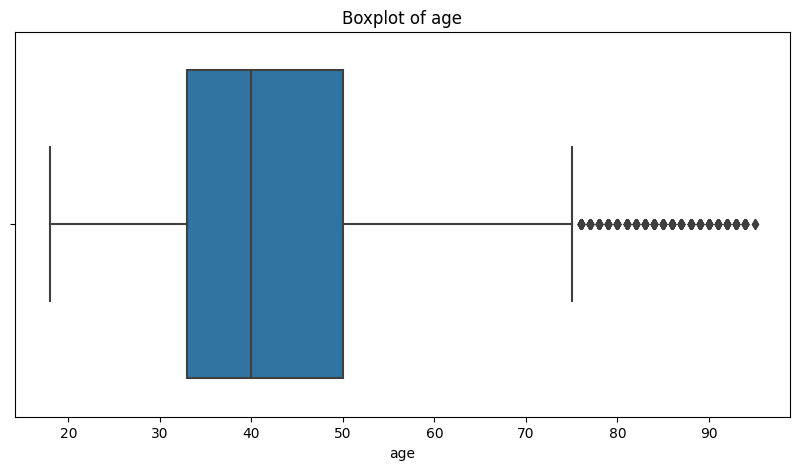

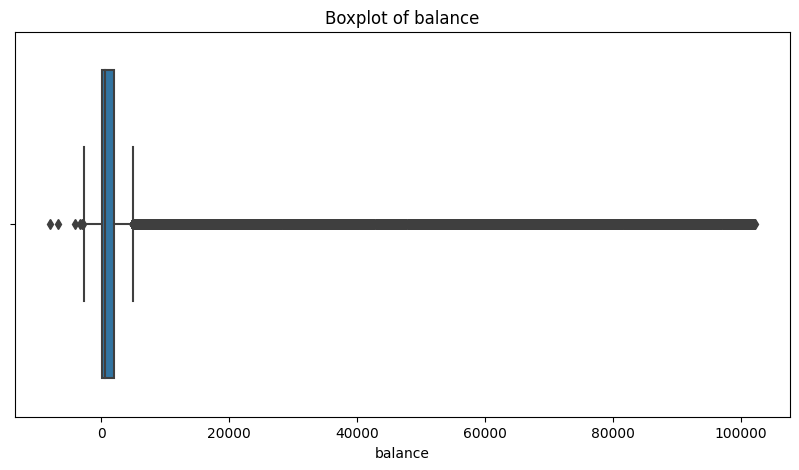

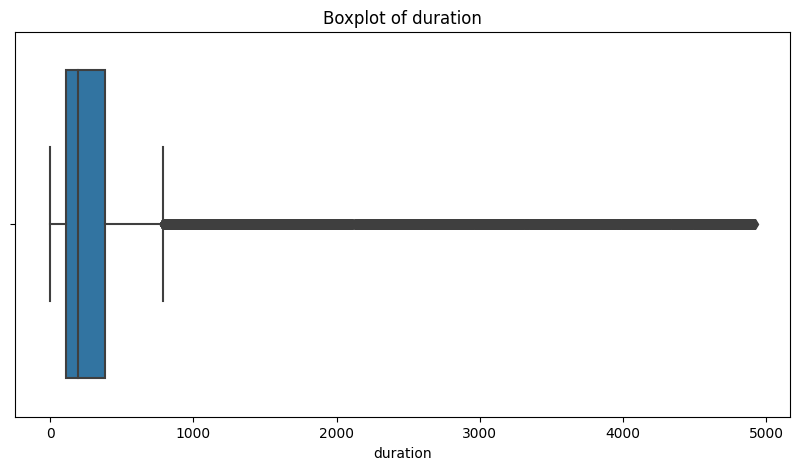

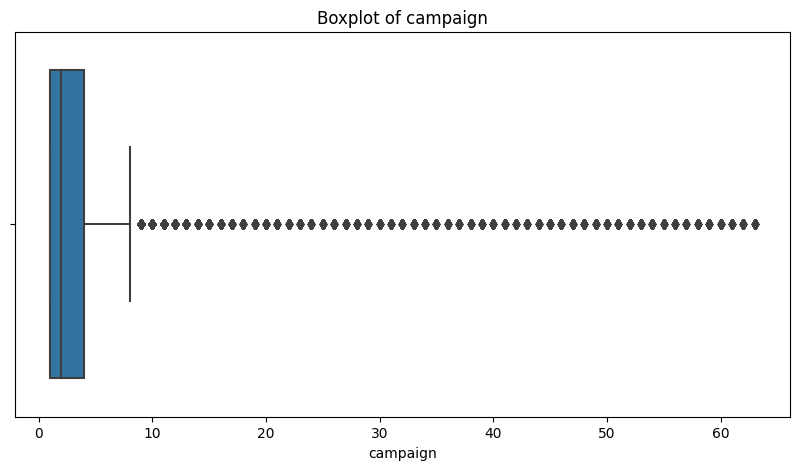

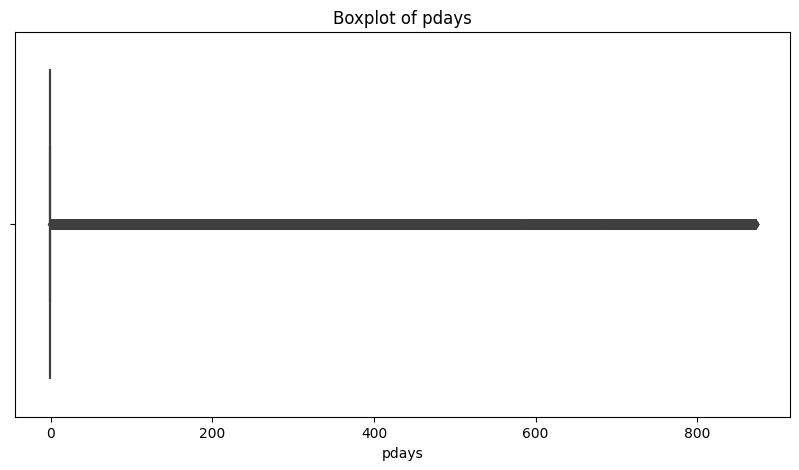

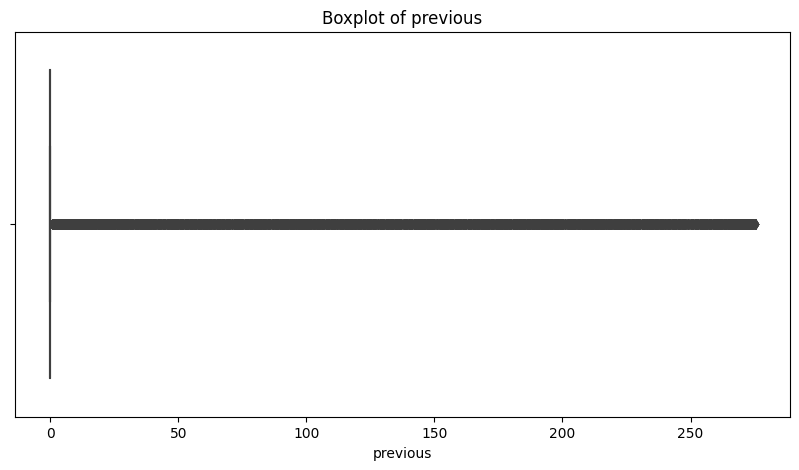

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns (replace with the actual column names from your data)
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']  # Example columns

# Boxplot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_data, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()



**Previous** : The plot highlights the number of previous contacts made to customers.
A majority of customers have 0 or 1 prior contacts, indicating a lack of repeated engagement.
A few customers were contacted more than 50 times, with extreme outliers going up to 250.
The distribution is heavily skewed, suggesting the need for feature transformation.

**Pdays** : "Pdays" (number of days since the last contact) has a large spike around a specific value (likely 999, meaning "not previously contacted").
A minority of customers have smaller "pdays" values, indicating recent contact.
The distribution suggests a clear separation between those contacted recently and those never contacted, making it an important categorical feature.

**Campaign** : The majority of customers were contacted fewer than 5 times during the current campaign.
There are extreme cases where customers were contacted more than 50 times, representing aggressive targeting.
Frequent contacts might indicate persistent marketing efforts but could also lead to customer fatigue.

**Duration** : Call duration varies widely, with a large portion of calls being short.
Longer call durations likely indicate productive customer interactions, as customers stayed engaged for a significant time. Shorter calls might reflect customer disinterest or quick call terminations.

**Balance** : Most customers have low balances, with some having negative balances (possibly indicating financial difficulties).
There is a long tail of very high balances, representing a small group of wealthy customers.
Negative balances may indicate a different customer behavior pattern, which could impact campaign responses.

**Age** : The majority of customers fall into the 30-50 age range.
Younger (<30) and older (>60) age groups are less represented.
Outliers above age 80 are rare but may represent a unique customer segment.

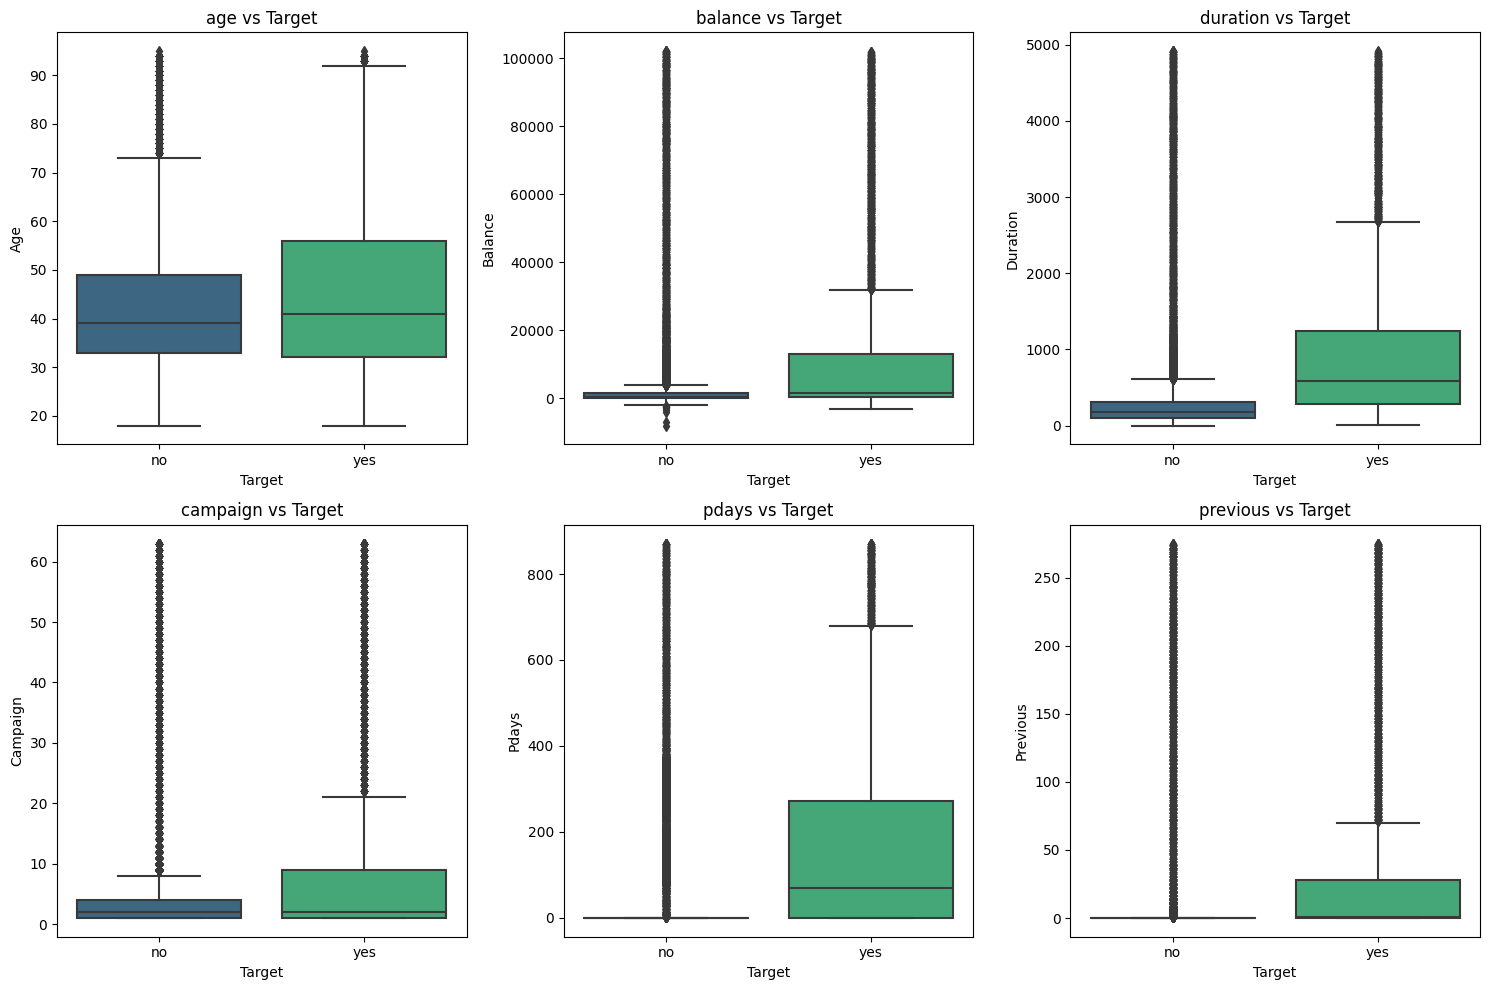

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'target' is in the dataset
# No splitting; keep target in the original dataset for visualization
train_data_with_target = train_data.copy()  # Make a copy of the dataset (optional for safety)

# List of numerical columns
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Number of rows and columns for the grid
n_rows = 2
n_cols = 3

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Generate a boxplot for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='target', y=col, data=train_data_with_target, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs Target')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel(col.capitalize())

# Hide any unused subplots (if the number of plots is less than n_rows * n_cols)
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# Relationship between the target variable and the numerical features.
**Age vs Target** : The age distribution is slightly higher for customers who responded positively (target=1) compared to those who didn’t (target=0).
Both groups have a similar range, with most customers falling between 25 and 60 years of age.
Older customers may be more likely to engage positively with the marketing campaign.

**Balance vs Target** : Customers who responded positively (target=1) tend to have higher bank balances, as indicated by the larger spread and higher median for this group.
Customers with very low or negative balances are less likely to engage positively.
Higher balances are associated with positive outcomes.

**Duration vs Target** : Call duration is significantly higher for positive responses (target=1), with a much larger spread and median compared to negative responses (target=0).
Short calls are strongly associated with negative responses, while longer calls are more likely to yield positive outcomes.

**Campaign vs Target** : The number of contacts made during the current campaign is slightly higher for positive responses (target=1), though the median is similar across both groups.
Outliers are present for both groups, with some customers contacted more than 50 times.

**Pdays vs Target** : Customers with lower pdays values (more recent contact) show higher positive response rates (target=1).
A large portion of the data has very high pdays values (likely representing customers who were not contacted recently or at all).

**Previous vs Target** : Customers with a higher number of previous contacts (previous) are more likely to respond positively (target=1).
The spread is wider for positive responses, indicating that repeated engagements may improve the likelihood of success.

In [9]:
# Select only numerical columns
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Calculate correlation matrix for train_data
correlation_matrix = train_data[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

               age   balance  duration  campaign     pdays  previous
age       1.000000  0.289150  0.255573  0.269439  0.199507  0.277487
balance   0.289150  1.000000  0.669737  0.674339  0.562097  0.716816
duration  0.255573  0.669737  1.000000  0.630944  0.527020  0.683951
campaign  0.269439  0.674339  0.630944  1.000000  0.519469  0.689211
pdays     0.199507  0.562097  0.527020  0.519469  1.000000  0.586175
previous  0.277487  0.716816  0.683951  0.689211  0.586175  1.000000


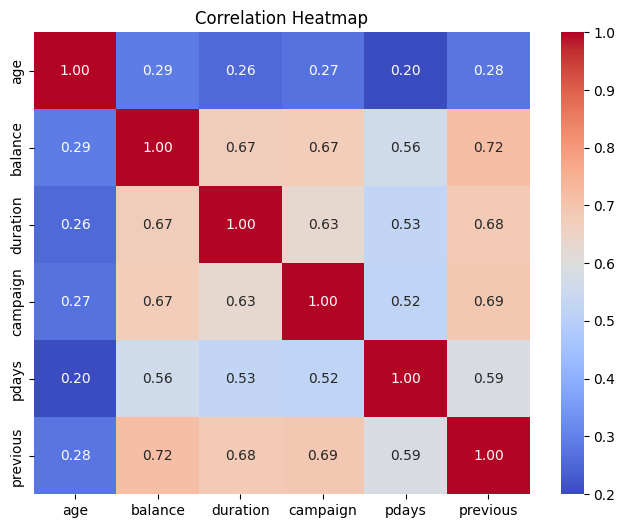

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**Age** : Weak correlation with balance (0.29), duration (0.26), campaign (0.27), and previous (0.28).
Very weak correlation with pdays (0.20).

**Balance** : High correlation with previous (0.72) and duration (0.67).
Moderate correlation with campaign (0.67) and pdays (0.56).
Weak correlation with age (0.29).

**Duration** : High correlation with balance (0.67) and previous (0.68).
Moderate correlation with campaign (0.63) and pdays (0.53).
Weak correlation with age (0.26).

**Campaign** : High correlation with previous (0.69) and balance (0.67).
Moderate correlation with duration (0.63) and pdays (0.52).
Weak correlation with age (0.27).

**Pdays** : Moderate correlation with balance (0.56), duration (0.53), campaign (0.52), and previous (0.59).
Weak correlation with age (0.20).

**Previous** : High correlation with balance (0.72), duration (0.68), and campaign (0.69).
Moderate correlation with pdays (0.59).
Weak correlation with age (0.28).

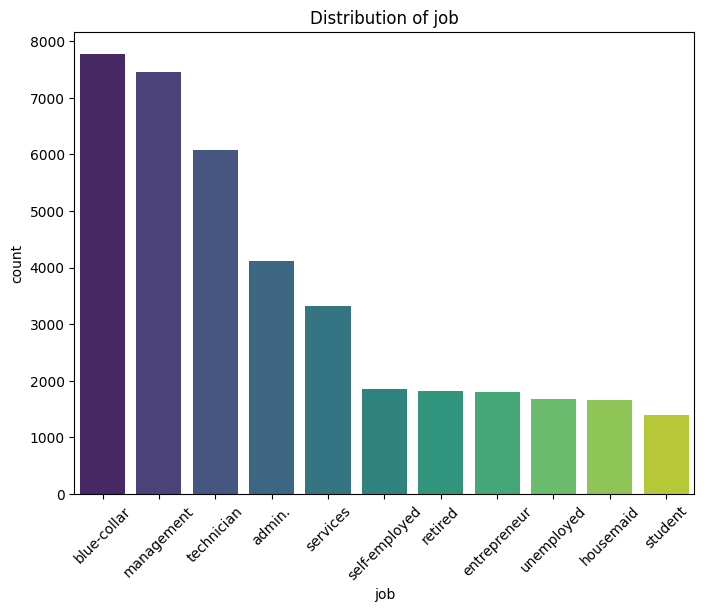

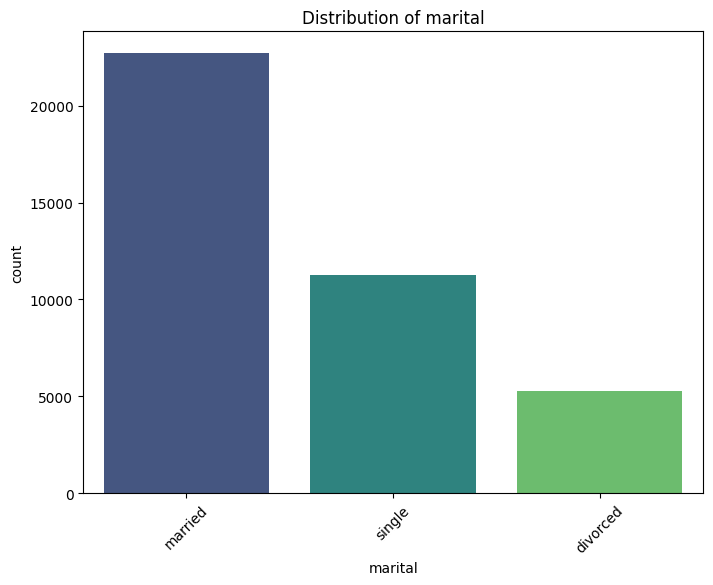

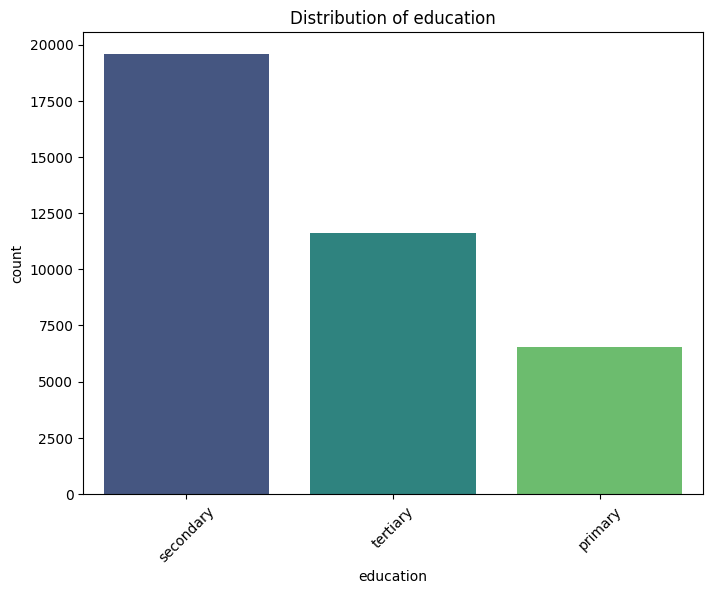

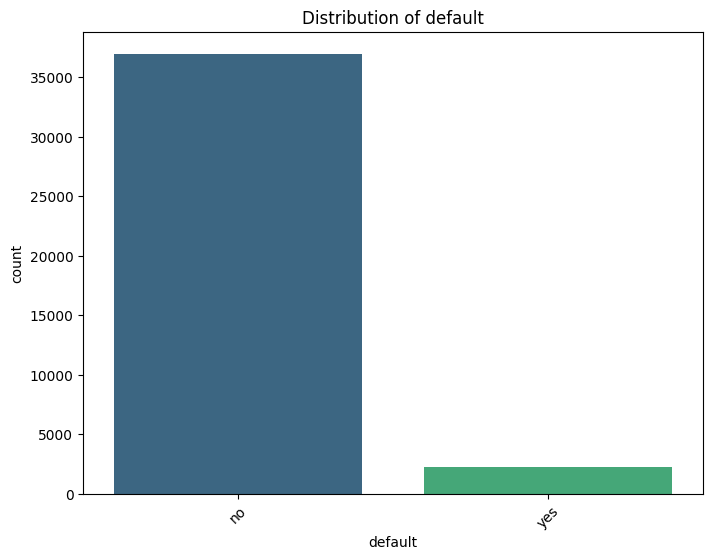

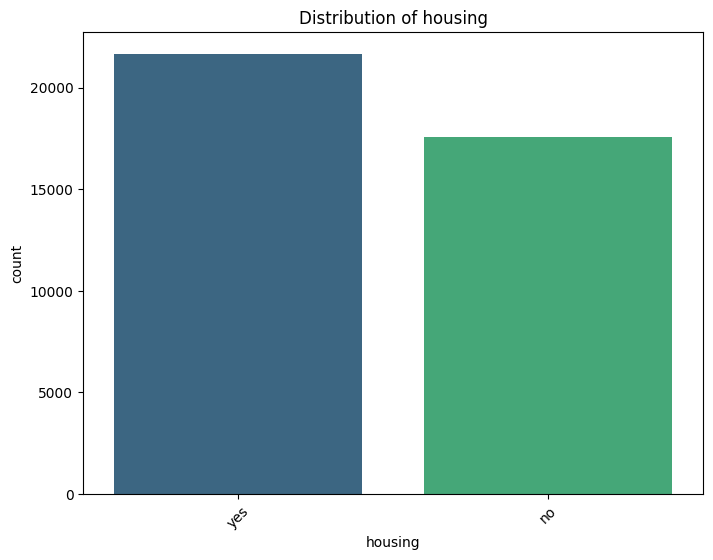

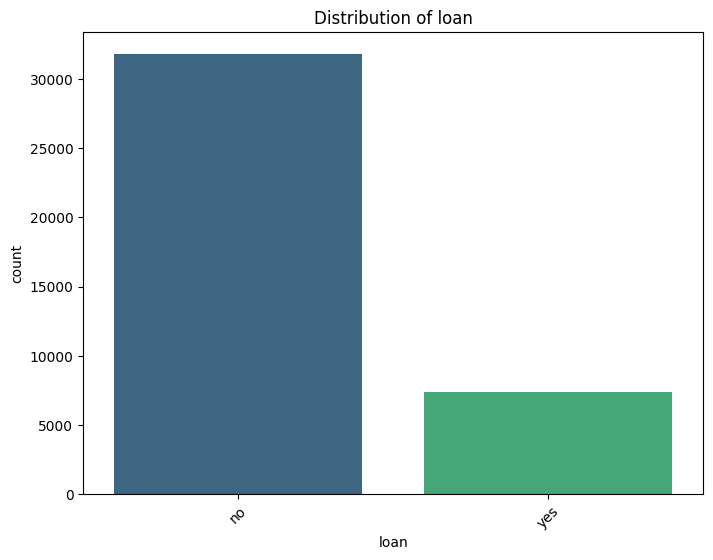

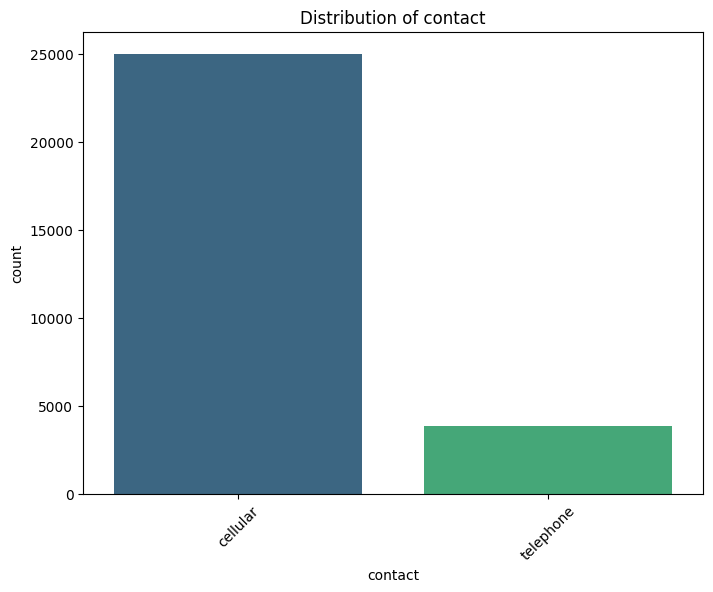

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of each category for all categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


**Job** : The largest job categories include blue-collar, management, and technicians, while smaller groups consist of students, housemaids, and entrepreneurs.

**Marital** : A significant portion of customers are married, followed by single customers, and a smaller group is divorced.

**Education** : The largest proportion of customers has a secondary education, followed by those with tertiary education, and the smallest group has primary education.

**Default** : Only a very small percentage of customers have a credit default, with the majority being financially stable and free from defaults.

**Housing**: A significant proportion of customers have a housing loan. There is a noticeable but smaller group without a housing loan.

**Loan** : Around 70-80% of customers do not have personal loans, while the remaining 20-30% have taken loans.

**Contact** : The majority of customers were contacted via cellular phones, while only a small proportion were reached through telephone.

# Data Preprocessing

In [12]:
train_data['job'] = train_data['job'].fillna(train_data['job'].mode()[0])
train_data['education'] = train_data['education'].fillna(train_data['education'].mode()[0])
train_data['contact'] = train_data['contact'].fillna(train_data['contact'].mode()[0])

#test_data
test_data['job'] = test_data['job'].fillna(test_data['job'].mode()[0])
test_data['education'] = test_data['education'].fillna(test_data['education'].mode()[0])
test_data['contact'] = test_data['contact'].fillna(test_data['contact'].mode()[0])

In [13]:
#Drop the 'poutcome' column from train_data
train_data.drop(columns=['poutcome'],inplace=True)


# Drop the 'poutcome' column from test_data
test_data.drop(columns=['poutcome'],inplace=True)

In [14]:
train_data['last contact date'] = pd.to_datetime(train_data['last contact date'], errors='coerce')
test_data['last contact date'] = pd.to_datetime(test_data['last contact date'], errors='coerce')

In [15]:
train_data['last_contact_month'] = (train_data['last contact date'].dt.month).astype('object')
train_data['last_contact_day'] = (train_data['last contact date'].dt.day).astype('object')

test_data['last_contact_month'] = (test_data['last contact date'].dt.month).astype('object')
test_data['last_contact_day'] = (test_data['last contact date'].dt.day).astype('object')

In [16]:
train_data.drop('last contact date',axis=1,inplace=True)
test_data.drop('last contact date',axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

In [18]:
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = [ 'marital','education', 'default', 'housing', 'loan', 'contact','last_contact_month','last_contact_day']

In [19]:
train_target = pd.DataFrame()
train_target['target'] = train_data['target']
train_data = train_data.drop(columns=['target'])

# Encoding

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
import pandas as pd

label_encoder = LabelEncoder()
train_target['target'] =label_encoder.fit_transform(train_target['target'].astype(object))


def label_encode_columns(X):
    X = X.copy()
    for col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(object))
    return X


# Numerical Transformer with StandardScaler
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])




# Combine Preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), numerical_columns),  # Numerical preprocessing
        
        ('cat', Pipeline(steps=[
            ('label_encoder', FunctionTransformer(label_encode_columns, validate=False))
        ]), categorical_columns)  # Categorical preprocessing
    ]
)
# Apply Preprocessor
processed_train_data = preprocessor.fit_transform(train_data)
processed_test_data = preprocessor.transform(test_data)



# HyperParameter Tuning

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [22]:
models = {
    "Random Forest": (
        Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(random_state=42, class_weight="balanced"))
        ]),
        {
            'classifier__n_estimators': [100],
            'classifier__max_depth': [16],
            'classifier__min_samples_split': [5],
           # 'classifier__min_samples_leaf': [1, 2],
           # 'classifier__max_features': ['sqrt']
        }
    ),
    "Gradient Boosting": (
        Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', GradientBoostingClassifier(random_state=42))
        ]),
        {
            'classifier__n_estimators': [100],
            'classifier__learning_rate': [0.1, 0.01],
            'classifier__max_depth': [3, 5],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2]
        }
    ),
    "XGBoost": (
        Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
        ]),
        {
            'classifier__n_estimators': [100],
            'classifier__learning_rate': [0.1, 0.01],
            'classifier__max_depth': [3, 5],
            'classifier__subsample': [0.8, 1.0],
            'classifier__colsample_bytree': [0.8, 1.0]
        }
    )
}

In [23]:
best_f1 = 0
best_model_name = None
best_model_params = None

In [24]:
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=2, verbose=2, n_jobs=-1)
    grid_search.fit(train_data, train_target.squeeze().to_numpy())
    
    # Evaluate F1 score on training data
    y_pred = grid_search.best_estimator_.predict(train_data)
    f1 = f1_score(train_target, y_pred)
    
    print(f"{model_name} - Best Params: {grid_search.best_params_} - F1 Score: {f1}")

    if f1 > best_f1:
        best_f1 = f1
        best_model_name = model_name
        best_model_params = grid_search.best_params_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Random Forest - Best Params: {'classifier__max_depth': 16, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100} - F1 Score: 0.8191061370784872
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Gradient Boosting - Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100} - F1 Score: 0.6321383708570876
Fitting 2 folds for each of 16 candidates, totalling 32 fits
XGBoost - Best Params: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8} - F1 Score: 0.6139014749831293


In [25]:
print(f"Best Model: {best_model_name} with F1 Score: {best_f1} and Params: {best_model_params}")

Best Model: Random Forest with F1 Score: 0.8191061370784872 and Params: {'classifier__max_depth': 16, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


In [26]:
if best_model_name == "Random Forest":
    # Remove the 'classifier__' prefix
    clean_params = {k.replace('classifier__', ''): v for k, v in best_model_params.items()}
    best_model = RandomForestClassifier(**clean_params, random_state=42, class_weight="balanced")
elif best_model_name == "Gradient Boosting":
    clean_params = {k.replace('classifier__', ''): v for k, v in best_model_params.items()}
    best_model = GradientBoostingClassifier(**clean_params, random_state=42)
elif best_model_name == "XGBoost":
    clean_params = {k.replace('classifier__', ''): v for k, v in best_model_params.items()}
    best_model = XGBClassifier(**clean_params, random_state=42, use_label_encoder=False, eval_metric='logloss')


**Model Fitting**

In [27]:
best_model.fit(processed_train_data,train_target.squeeze().to_numpy())

RandomForestClassifier(class_weight='balanced', max_depth=16,
                       min_samples_split=5, random_state=42)

In [28]:
# Generate predictions on test_data
y_test_pred = best_model.predict(processed_test_data)

In [29]:
y_test_pred = list(y_test_pred)

In [30]:
prediction=[]
yes=0
no=0
for i in y_test_pred:
    if i == 0:
        prediction.append("no")
        no+=1
    else:
        prediction.append("yes")
        yes+=1
print(yes)
print(no)

2002
7998


# Submission

In [31]:
# Create the submission DataFrame
submission = pd.DataFrame({"id": range(0, test_data.shape[0]), 
                          "target": prediction})

# Save to CSV
submission.to_csv('submission.csv', index=False)